In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad
import sklearn.metrics
import pylab

In [2]:
examples = 1000
features = 100
LEARNING_RATE = 0.01
D = (npr.randn(examples, features), npr.randn(examples,1)) # [X, y]

In [3]:
# Specify the network 初始化network共两层，第一层10个神经元，第二层1个神经元
layer1_units = 10
layer2_units = 1
w1 = npr.rand(features, layer1_units)   # 第一层10个神经元，每个有100个feature (共1000个权重)
b1 = npr.rand(layer1_units) # 偏移项
w2 = npr.rand(layer1_units, layer2_units) # 第二层（输出层）1个神经元，每个有100个feature（共100个权重）
b2 = 0.0 # 偏移项
theta = (w1, b1, w2, b2)

In [4]:
# Define the loss function 定义损失函数
def squared_loss(y, y_hat):
    return np.dot((y - y_hat),(y - y_hat))

In [5]:
# Output Layer 这个demo暂时没用到
def binary_cross_entropy(y, y_hat):
    return np.sum(-((y * np.log(y_hat)) + ((1-y) * np.log(1 - y_hat))))

In [6]:
# forward pass 前向传播【WX+b -> tanh激活函数 -> WX+b -> tanh激活函数(output)】
def neural_network(x, theta):
    w1, b1, w2, b2 = theta
    return np.tanh(np.dot((np.tanh(np.dot(x,w1) + b1)), w2) + b2)

In [11]:
# Wrapper around the objective function to be optimised
def objective(theta, idx):
    return squared_loss(D[1][idx], neural_network(D[0][idx], theta))

# Compute Gradient 装载objective函数
grad_objective = grad(objective)

In [9]:
# Update
def update_theta(theta, delta, alpha):
    w1, b1, w2, b2 = theta
    w1_delta, b1_delta, w2_delta, b2_delta = delta
    w1_new = w1 - alpha * w1_delta  # alpha is learning rate
    b1_new = b1 - alpha * b1_delta
    w2_new = w2 - alpha * w2_delta
    b2_new = b2 - alpha * b2_delta
    new_theta = (w1_new,b1_new,w2_new,b2_new)
    return new_theta

In [12]:
# Train the Neural Network
epochs = 10
print ("RMSE before training:", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))
##注意下mini-batch，如果mini-batch size = m: Batch gradient descent；如果mini-batch = 1: Stochastic gradient descent, every example is its own mini-batch
rmse = []
for i in range(0, epochs):
    for j in range(0, examples):  # 这里mini-batch就是每个样本，一般可以比如一个mini-batch包含64,128,256或512个样本
        delta = grad_objective(theta, j) # 根据BP算法计算每个权重和偏移项的delta
        theta = update_theta(theta,delta, LEARNING_RATE) # 这里的0.01就是learning rate
        rmse.append(sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))
print("RMSE after training:", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))

RMSE before training: 1.94222747317
RMSE after training: 0.705272602087


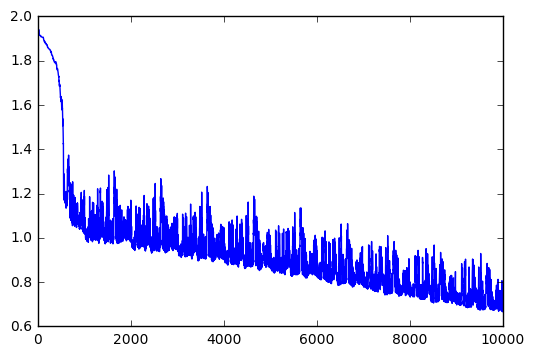

In [13]:
pylab.plot(rmse)
pylab.show()